<h2 style="color:Blue;"> Build a Deep CNN Image Classifier with ANY Images </h2>

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

### Removing Dodgy Images

In [2]:
# Removing dodgy images
import cv2
import imghdr #imghdr helps to identify image extension

In [3]:
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [4]:
for image_class in os.listdir(data_dir):
    print(image_class)

happy
sad


In [5]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

05-12-21-happy-people.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
170404-happy-workers-feature.jpg
1902544.jpg
1920px-face-smile.svg_.png
1HEoLBLidT2u4mhJ0oiDgig.png
35438_hd.jpg
7-Habits-of-Happy-People-image.jpeg
7-principles-of-successful-and-happy-people.png
960x0.jpg
A_Sep20_14_1189155141.jpg
best-happy-quotes-1574799429.jpg
cess-group-positive-friends-celebrate-victory-achievement-together_1016-9922.jpg
compassion-900x387.jpg
Dollarphotoclub_76084977-1.jpg
e162ccda8ce0f197f8863f327add9233.jpg
friends-happy-190821.jpg
friends_190412.jpg
GettyImages-1152307607_525151_wrcmhy.jpg
GettyImages-565706549-949x534.jpg
GettyImages-871518740-1024x707.jpg
getty_152414899_97046097045006_68075.jpg
getty_476846599_970647970450014_65484.jpg
getty_478389113_970647970450091_99776.jpg
getty_494581822_130796.jpg
getty_505175324_2000131020009280246_158016.jpg
goup-happy-people-group-jumping-isolated-white-background-35581971.jpg
goup-happy-people-group-jumping-isolated-white-background-3

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image not in ext list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Issue with image {}".format(image_path))

## Load Dataset

In [7]:
# tf.data.Dataset??

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Using keras utility to help in accesing the directory
data = tf.keras.utils.image_dataset_from_directory('data')

Found 136 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
data_iterator

In [12]:
batch = data_iterator.next()

In [13]:
batch

(array([[[[1.88125000e+01, 4.18125000e+01, 1.37500000e+00],
          [2.12500000e+01, 4.42500000e+01, 2.25000000e+00],
          [1.92500000e+01, 4.22500000e+01, 5.62500000e-01],
          ...,
          [1.73750000e+01, 4.33750000e+01, 3.75000000e-01],
          [1.80625000e+01, 4.60625000e+01, 1.87500000e-01],
          [2.05625000e+01, 4.75625000e+01, 2.56250000e+00]],
 
         [[2.19375000e+01, 4.49375000e+01, 2.93750000e+00],
          [2.15625000e+01, 4.35625000e+01, 0.00000000e+00],
          [1.84375000e+01, 4.14375000e+01, 3.12500000e-01],
          ...,
          [2.26250000e+01, 4.86250000e+01, 1.62500000e+00],
          [2.21875000e+01, 5.11875000e+01, 7.18750000e+00],
          [2.51875000e+01, 5.21875000e+01, 7.18750000e+00]],
 
         [[1.71875000e+01, 4.28125000e+01, 3.75000000e-01],
          [2.11875000e+01, 4.22500000e+01, 9.37500000e-01],
          [2.44375000e+01, 4.24375000e+01, 8.75000000e-01],
          ...,
          [2.52500000e+01, 5.15000000e+01, 3.5625

In [14]:
len(batch)

2

In [15]:
batch[0].shape

(32, 256, 256, 3)

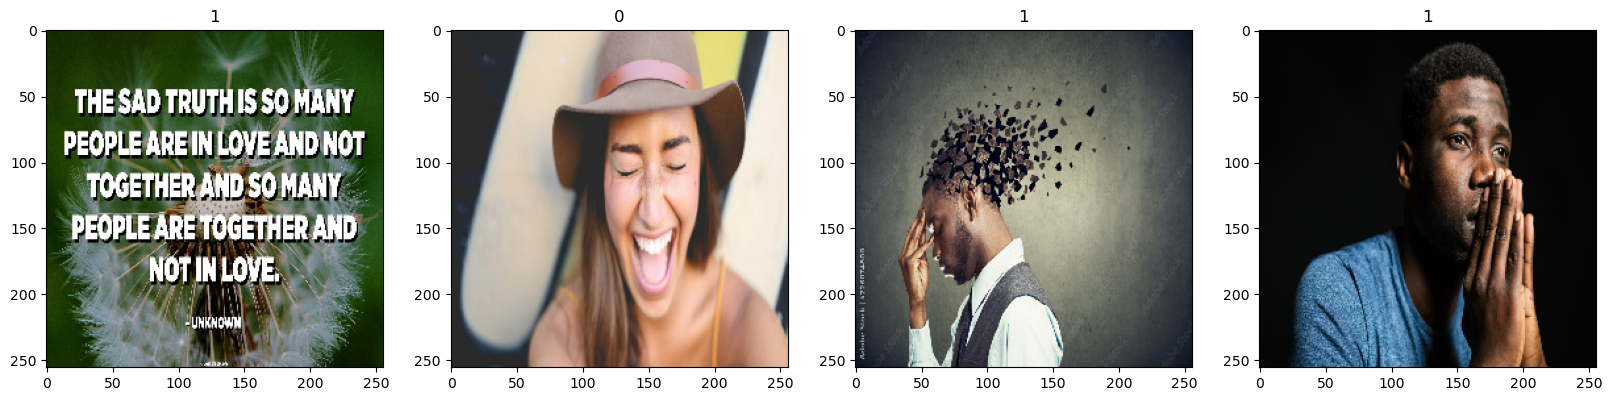

In [16]:
# Check the flag assigned to each image(either sad or happy)
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

##### From the above plot, we can see that 0 is for happy people while 1 is for sad people

# Data Processing

### Data Scaling

In [17]:
batch[0].min()

0.0

In [18]:
batch[0].max()

255.0

In [19]:
# To avoid scaling every time the data is loaded, we can scale using the pipeline capability as shown below
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [20]:
scaled_iterator = data.as_numpy_iterator()

In [21]:
batch = scaled_iterator.next()

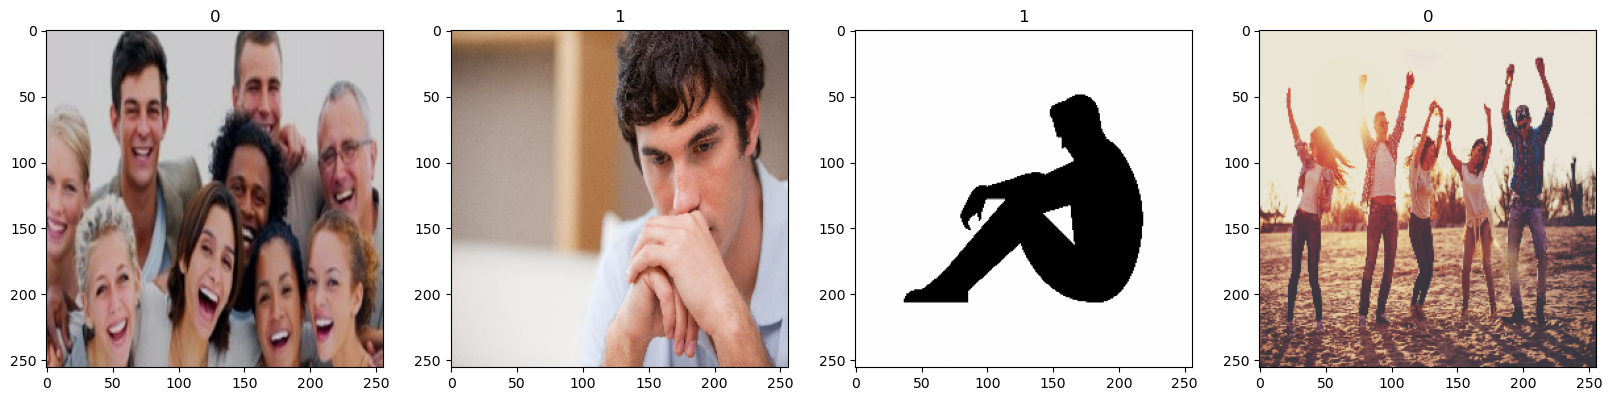

In [23]:
#Because we have scaled our images, they are no longer going to be integers
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### Split Data

In [49]:
len(data)

5

In [50]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [51]:
train_size

3

In [52]:
val_size

1

In [53]:
test_size

1

In [54]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [55]:
len(test)

1

### Building the Deep Learning Model

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [58]:
model = Sequential()

In [59]:
model.add(Conv2D(16, (3, 3), 1, activation = 'relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

#### From above setup, we have 3 convolution blocks, one flatten layer, and two dense layers

In [60]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)      

<h3 style="color:blue;"> Training the DNN </h3>

In [65]:
logdir = 'logs'

In [66]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [67]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 36s 8s/step - loss: 1.3050 - accuracy: 0.5417 - val_loss: 1.0144 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 28s 9s/step - loss: 0.9049 - accuracy: 0.4792 - val_loss: 0.6800 - val_accuracy: 0.5312
Epoch 3/20
3/3 [==============================] - 25s 8s/step - loss: 0.6886 - accuracy: 0.4792 - val_loss: 0.6513 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 31s 10s/step - loss: 0.6628 - accuracy: 0.5312 - val_loss: 0.6518 - val_accuracy: 0.5938
Epoch 5/20
3/3 [==============================] - 28s 9s/step - loss: 0.6154 - accuracy: 0.6562 - val_loss: 0.5402 - val_accuracy: 0.7500
Epoch 6/20
3/3 [==============================] - 26s 8s/step - loss: 0.5633 - accuracy: 0.6667 - val_loss: 0.4907 - val_accuracy: 0.8438
Epoch 7/20
3/3 [==============================] - 27s 8s/step - loss: 0.5320 - accuracy: 0.8125 - val_loss: 0.4778 - val_accuracy: 0.7500
Epoch 8/20
3/3 [=================

#### Plot perfomance

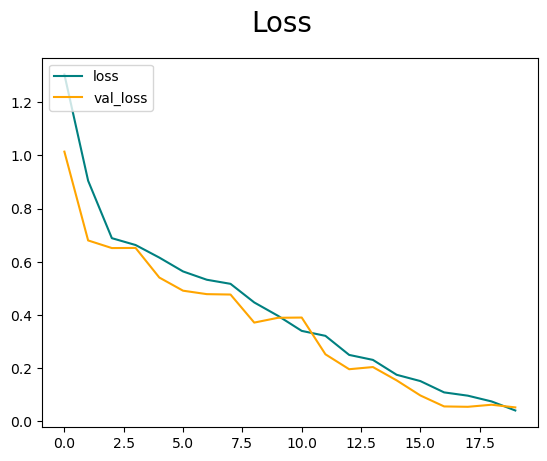

In [70]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle("Loss", fontsize=20)
plt.legend(loc = 'upper left')
plt.show()

<h5 style="color:purple;">Accuracy Score </h5>

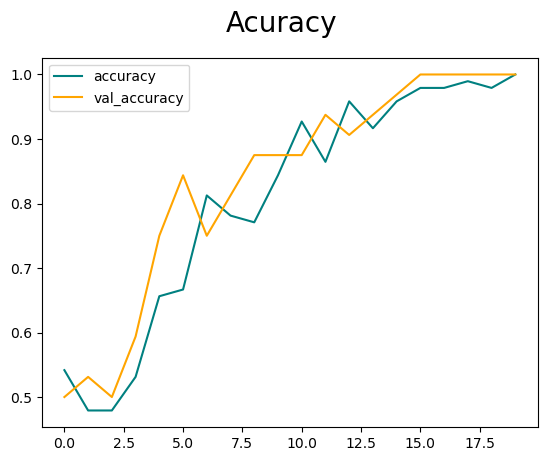

In [71]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle("Acuracy", fontsize=20)
plt.legend(loc = 'upper left')
plt.show()

## Evaluate perfomance

<h5 style="color:purple"> Evaluate </h5>

In [72]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [75]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [81]:
len(test)

1

In [107]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 328ms/step


In [108]:
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


<h4 style="color:purple"> Test </h4>

In [109]:
import cv2

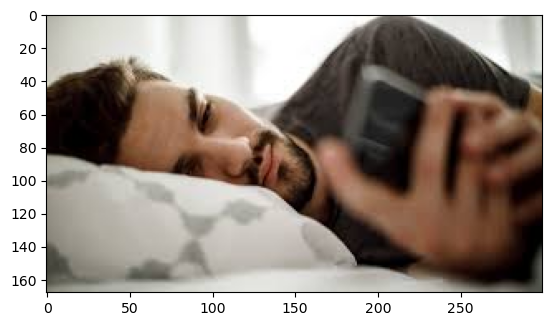

In [111]:
img = cv2.imread("sad_test.jpeg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

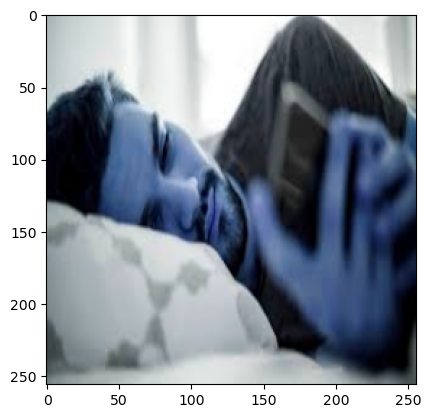

In [112]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
# plt.imshow(cv2.cvtColor(resize.numpy(), cv2.COLOR_BGR2RGB))
plt.show

In [113]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 69ms/step


In [114]:
yhat

array([[0.6724344]], dtype=float32)

In [115]:
if yhat > 0.5:
    print("The person is sad")
else:
    print("The person is happy")

The person is sad


# Save the model

In [116]:
from tensorflow.keras.models import load_model

##### Before loading the model , let`s first save it

In [117]:
model.save(os.path.join('models', 'imageclassifier.h5'))

In [118]:
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))

In [119]:
new_model

In [120]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 286ms/step


array([[0.6724344]], dtype=float32)